In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#set datadir based on cwd
cwd = os.getcwd()
#OSX
datadir = cwd + '/data/'
raw = pd.read_csv(datadir+'raw.csv')

#Windows
#datadir = cwd + '\\data\\'
#raw = pd.read_csv(datadir+'raw_data.csv')

<h3>Part 1: Data Cleaning </h3>

In [5]:
df = raw.drop(['defendantid','NewArrests36','NewFelArrests36', 'NewMisdArrests36', 'NewViolArrests36','NewArrest36', 'NewFelArrest36', 'NewMisdArrest36', 'NewViolArrest36'],axis = 1)

#created binary target variable
#we are going to predict if the preson will commit a crime or not in the future 36 month
df = df.rename(columns={'NewArrest36Type':'NewArrest36'})
#classified target variable from multiclass to binary
df['NewArrest36'] = df['NewArrest36'].apply(lambda x:0 if x == 'None' else 1 )
df.head()

,gender,race,category,MajorGroupDetail,AgeAtFirst,OrderProtect,Housing,Age,MisdConviction,FelonyConviction,...,Prison,Incarcerations5,Jail5,Prison5,Incarcerations10,Jail10,Prison10,CareerLength,CvtDensity,NewArrest36
0,M,Asian/Pacific Islander,Misdemeanor,UGV,NaN,0,0,32.0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,0
1,F,Black,Misdemeanor,Forged Instrument,30.0,0,0,42.0,0,0,...,0,0,0,0,0,0,0,12.0,0.000000,0
2,M,Black,Misdemeanor,Marijuana,23.0,1,0,30.0,1,0,...,0,4,4,0,4,4,0,8.0,0.866025,1
3,M,Black-Hispanic,Misdemeanor,Drugs,33.0,0,1,54.0,1,1,...,1,4,4,0,11,11,0,23.0,1.693979,1
4,M,Black,Felony,Grand Larceny,18.0,0,0,24.0,1,1,...,0,2,2,0,2,2,0,7.0,0.845154,1


In [6]:
#Step 1: drop all columns with 10 and 9. We only look at data within 5 years
for i in df.columns:
    if '10' in i or '9' in i:
        df = df.drop(i,axis = 1)
        
#Step 2: drop features based on domain knowledge
df = df.drop(['CareerLength','MajorGroupDetail','CvtTypes'],axis = 1)

In [7]:
#some cleaning
df['race'] = df['race'].apply(lambda x: 'Unknown' if x == 'Unsure' else x)
#check missing value
df.isnull().sum()

gender                   0
race                     4
category               191
AgeAtFirst           47661
OrderProtect             0
Housing                  0
Age                    147
MisdConviction           0
FelonyConviction         0
ViolentConviction        0
ViolentOffense           0
Gang                     0
BWO24                    0
BWO24Plus                0
Arrests                  0
FelArrests               0
MisdArrests              0
ViolArrests              0
Arrests5                 0
FelArrests5              0
MisdArrests5             0
ViolArrests5             0
Cvts                     0
FelCvts                  0
MisdCvts                 0
ViolCvts                 0
DrugCvts                 0
DrugFelCvts              0
SexCvts                  0
BurgFelCvts              0
RobFelCvts               0
LarcFelCvts              0
AssFelCvts               0
WeapFelCvts              0
Cvts5                    0
CvtCounties              0
FelCvts5                 0
M

In [8]:
#Fill missing values 
df['category'] = df['category'].fillna('Unspecified')
#Two main cols with missing values are AgeAtFirst and CvtDensity. Based on the data source, we replace the NA with appropriate value
df.AgeAtFirst = df.AgeAtFirst.combine_first(df.Age)
df.CvtDensity = df.CvtDensity.replace(np.nan,0)

#drop na values and check missing values again
df = df.dropna()
df.isnull().sum()

gender               0
race                 0
category             0
AgeAtFirst           0
OrderProtect         0
Housing              0
Age                  0
MisdConviction       0
FelonyConviction     0
ViolentConviction    0
ViolentOffense       0
Gang                 0
BWO24                0
BWO24Plus            0
Arrests              0
FelArrests           0
MisdArrests          0
ViolArrests          0
Arrests5             0
FelArrests5          0
MisdArrests5         0
ViolArrests5         0
Cvts                 0
FelCvts              0
MisdCvts             0
ViolCvts             0
DrugCvts             0
DrugFelCvts          0
SexCvts              0
BurgFelCvts          0
RobFelCvts           0
LarcFelCvts          0
AssFelCvts           0
WeapFelCvts          0
Cvts5                0
CvtCounties          0
FelCvts5             0
MisdCvts5            0
ViolCvts5            0
DrugCvts5            0
CvtTypes5            0
CvtCounties5         0
Incarcerations       0
Jail       

In [9]:
#Step 3: get dummy variables to multi-class features and make binary class features to (1,0)
cols_to_transform = ['race', 'category']
df = pd.get_dummies(df,columns = cols_to_transform) 
df['gender'] = df['gender'].apply(lambda x:1 if x == 'F' else 0)

#Step 4: make some change to specific columns
#switch 1,0 for housing col 
df['Housing'] = df['Housing'].apply(lambda x: 1  if x==0 else 0)

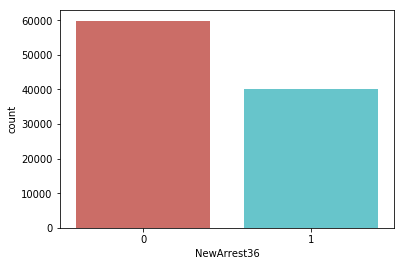

In [10]:
#check class balance 
sns.countplot(x='NewArrest36',data = df,palette='hls')
plt.show()

<h3>Part 2: Data Validation </h3>

<h3> Part 3: Data Finalization </h3>

In [11]:
#Step 5: save the clean data into data folder for later use
df = df.reset_index().drop('index',axis=1)
df.to_csv(datadir+'data_clean.csv')

In [12]:
df.head()

,gender,AgeAtFirst,OrderProtect,Housing,Age,MisdConviction,FelonyConviction,ViolentConviction,ViolentOffense,Gang,...,race_Black-Hispanic,race_Unknown,race_White,race_White-Hispanic,category_Felony,category_Infraction,category_Misdemeanor,category_Traffic Infraction,category_Unspecified,category_Violation
0,0,32.0,0,1,32.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,30.0,0,1,42.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,23.0,1,1,30.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,33.0,0,0,54.0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,18.0,0,1,24.0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


We have 61 features after the cleaning, and the next step is feature selection